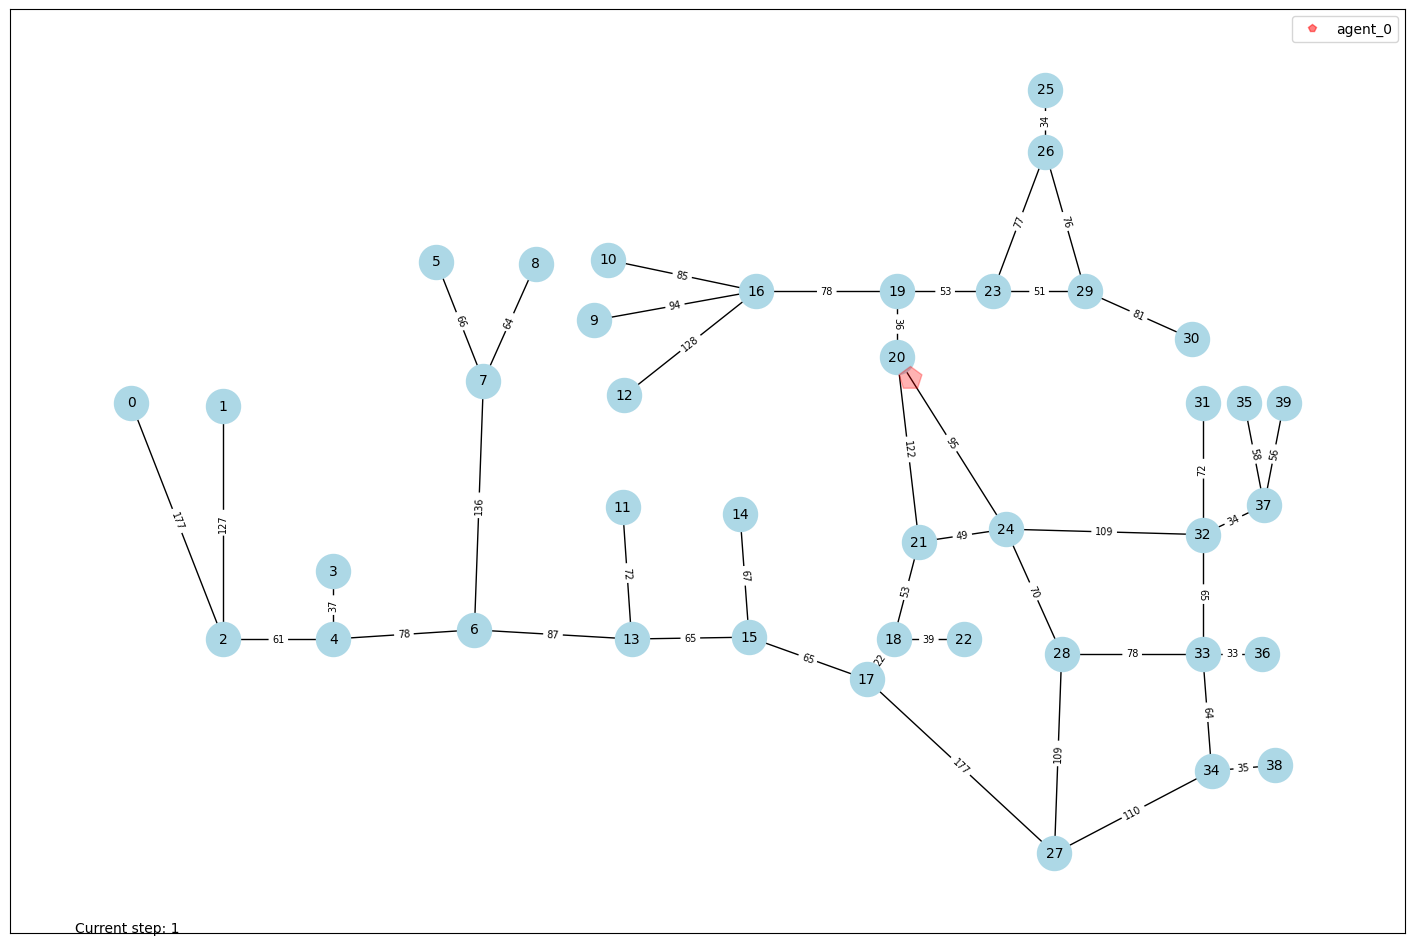

In [3]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.env.patrolling_zoo import PatrollingZooEnvironment
from patrolling_zoo.env.patrol_graph import PatrolGraph

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = PatrollingZooEnvironment(patrolGraph, 1)

observations = env.reset(seed=42)

# We temporarily fix the actions to a single node visit for each agent.
actions = {agent: env.action_space(agent).sample() for agent in env.agents}

while env.agents:
    # this is where you would insert your policy
    # actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    
    observations, rewards, terminations, truncations, infos = env.step(actions)

    clear_output(wait=True)
    env.render()

    break ######## TEMPORARY BREAK ########
env.close()